<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Introdu%C3%A7%C3%A3o_Python/Aula_5_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rosa dos ventos

- Dados de direção e velocidade do vento
- Trabalhando com dados meteorológicos
- Temperatura do ponto de orvalho
- Sensação térmica (o que é e como calcular)

Objetivos:

- Trabalhar e calcular alguns dados meteorológicos


In [ ]:
! pip install windrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import windrose as wr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Entendendo a rosa dos ventos

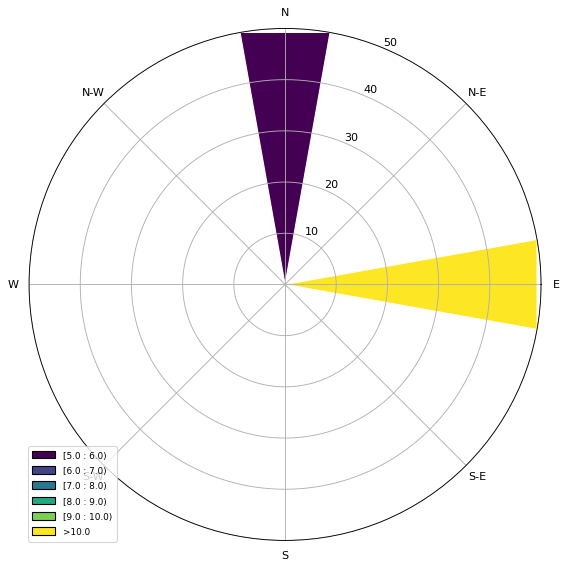

In [6]:
# Criando uma série curta de velocidade e direção do vento
# ws: wind speed; wd: wind direction

ws = np.array([5,5,10, 10]) # m/s
wd = np.array([0, 0, 90, 90]) # angulo em graus

ax = wr.WindroseAxes.from_ax(theta_labels = ('E', 'N-E', 'N', 'N-W', 'W', 'S-W', 'S', 'S-E'))
ax.bar(wd, ws, normed = True, opening = 0.9, edgecolor = 'white')
ax.set_legend()

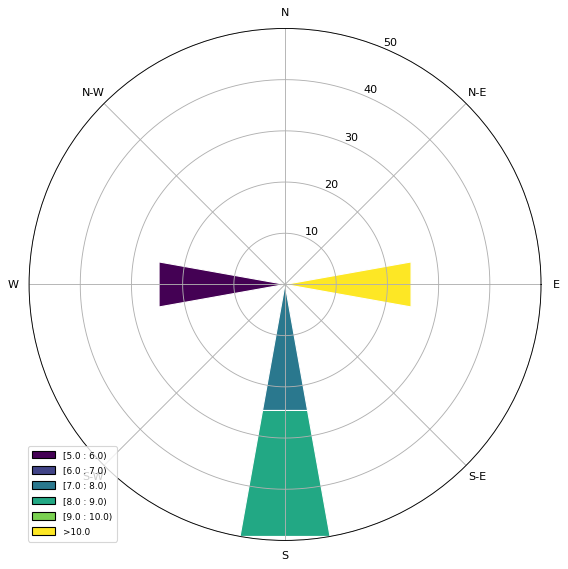

In [7]:
ws = np.array([5,7,8, 10]) # m/s
wd = np.array([270, 180, 180, 90]) # angulo em graus

ax = wr.WindroseAxes.from_ax(theta_labels = ('E', 'N-E', 'N', 'N-W', 'W', 'S-W', 'S', 'S-E'))
ax.bar(wd, ws, normed = True, opening = 0.9, edgecolor = 'white')
ax.set_legend() # O tamanho das barras equivale a quantidade de dados (porcentagem).
# Nesse caso 25% vem do W, 25% do E, 50% do Sul. Os números mostrados é a frequencia do histograma

### Gerar uma rosa dos ventos a partir de número pseudo-aleatórios entre 0 e 1
- np.random.random(size=None)

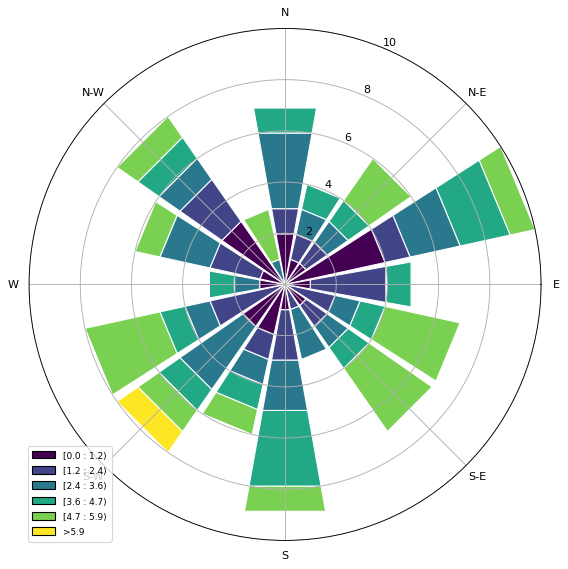

In [9]:
ws = np.random.random(100)*6
wd = np.random.random(100)*360

ax = wr.WindroseAxes.from_ax(theta_labels = ('E', 'N-E', 'N', 'N-W', 'W', 'S-W', 'S', 'S-E'))
ax.bar(wd, ws, normed = True, opening = 0.9, edgecolor = 'white')
ax.set_legend()

### von Mises distribution

Draw samples from a von Mises distribution.

Samples are drawn from a von Mises distribution with specified mode (mu) and dispersion (kappa), on the interval [-pi, pi].

The von Mises distribution (also known as the circular normal distribution) is a continuous probability distribution on the unit circle. It may be thought of as the circular analogue of the normal distribution.

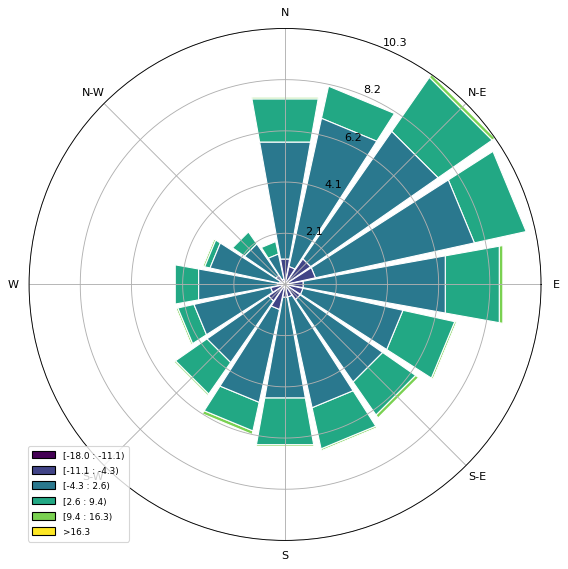

In [11]:
ws = np.random.vonmises(0, 3.14, 3000)*6
wd = np.random.vonmises(0, 3.14, 3000)*360

ax = wr.WindroseAxes.from_ax(theta_labels = ('E', 'N-E', 'N', 'N-W', 'W', 'S-W', 'S', 'S-E'))
ax.bar(wd, ws, normed = True, opening = 0.9, edgecolor = 'white')
ax.set_legend()

### Dados reais de estação meteorológica
 
URL = 'https://www.dropbox.com/s/yqb9yzf4y3jphwi/est-met-casa-2018_12_07_pto%2Bvirg.csv?dl=1'

In [13]:
URL = 'https://www.dropbox.com/s/yqb9yzf4y3jphwi/est-met-casa-2018_12_07_pto%2Bvirg.csv?dl=1'
estacao = pd.read_csv(URL, sep=';')
estacao

,NO.,Time,Interval,Indoor Temperature(oC),Indoor Humidity(%),Outdoor Temperature(oC),Outdoor Humidity(%),Relative Pressure(hpa),Absolute Pressure(hpa),Wind Speed(m/s),Gust(m/s),Wind Direction,DewPoint(oC),WindChill(oC),Hour Rainfall(mm),24 Hour Rainfall(mm),Week Rainfall(mm),Month Rainfall(mm),Total Rainfall(mm)
0,1,22/11/2018 23:17:47,5,22.7,72,20.3,87,1009.6,905.6,4.1,5.8,SE,18.1,17.7,0.0,0.0,0.0,0.0,0.0
1,2,22/11/2018 23:22:47,5,22.6,73,20.3,87,1009.6,905.6,3.1,4.1,SE,18.1,18.5,0.0,0.0,0.0,0.0,0.0
2,3,22/11/2018 23:27:47,5,22.5,73,20.3,88,1009.6,905.6,2.7,5.1,E,18.3,18.9,0.0,0.0,0.0,0.0,0.0
3,4,22/11/2018 23:32:47,5,22.4,73,20.3,88,1009.7,905.7,1.4,2.4,E,18.3,20.3,0.0,0.0,0.0,0.0,0.0
4,5,22/11/2018 23:37:47,5,22.5,73,20.3,88,1009.8,905.8,2.4,3.7,N,18.3,19.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,4116,07/12/2018 06:48:47,5,20.2,68,16.0,91,1010.9,906.9,0.7,1.4,S,14.6,16.0,0.0,0.0,0.0,0.3,40.5
4116,4117,07/12/2018 06:53:47,5,20.2,68,16.1,90,1010.8,906.8,2.4,3.1,S,14.5,14.6,0.0,0.0,0.0,0.3,40.5
4117,4118,07/12/2018 06:58:47,5,20.2,67,15.8,91,1011.1,907.1,2.4,3.1,SE,14.4,14.3,0.0,0.0,0.0,0.3,40.5
4118,4119,07/12/2018 07:03:47,5,20.0,68,15.6,92,1011.0,907.0,2.4,2.7,S,14.3,14.1,0.0,0.0,0.0,0.3,40.5


In [16]:
ws = estacao['Wind Speed(m/s)'].values
wd = estacao['Wind Direction'] # Dados do tipo string, requer conversão para graus antes de utilizar windrose

# ax = wr.WindroseAxes.from_ax(theta_labels = ('E', 'N-E', 'N', 'N-W', 'W', 'S-W', 'S', 'S-E'))
# ax.bar(wd, ws, normed = True, opening = 0.9, edgecolor = 'white')
# ax.set_legend()

In [19]:
wd_graus = wd.copy()
wd_graus.unique() # Retorna os valores únicos dentro dos dados analisados
# Com isso é possível converter essas direções e subdireções para os graus equivalentes

wd_graus = wd_graus.replace({' N' : 0})
wd_graus = wd_graus.replace({' NE': 45})
wd_graus = wd_graus.replace({' E' : 90})
wd_graus = wd_graus.replace({' SE': 135})
wd_graus = wd_graus.replace({' S' : 180})
wd_graus = wd_graus.replace({' SW': 225})
wd_graus = wd_graus.replace({' W' : 270})
wd_graus = wd_graus.replace({' NW': 315})
 
wd_graus = wd_graus.replace({' ENE' : 67.5})
wd_graus = wd_graus.replace({' NNE' : 22.5})
wd_graus = wd_graus.replace({' NNW' : 337.5})
wd_graus = wd_graus.replace({' WSW' : 247.5})
wd_graus = wd_graus.replace({' ESE' : 112.5})
wd_graus = wd_graus.replace({' WNW' : 292.5})
wd_graus = wd_graus.replace({' SSW' : 202.5})
wd_graus = wd_graus.replace({' SSE' : 157.5})

wd_graus = wd_graus.replace({' ENE' : 67.5})
wd_graus = wd_graus.replace({' NNE' : 22.5})
wd_graus = wd_graus.replace({' NNW' : 337.5})
wd_graus = wd_graus.replace({' WSW' : 247.5})
wd_graus = wd_graus.replace({' ESE' : 112.5})
wd_graus = wd_graus.replace({' WNW' : 292.5})
wd_graus = wd_graus.replace({' SSW' : 202.5})
wd_graus = wd_graus.replace({' SSE' : 157.5})

wd_graus = wd_graus.replace({' ---' : np.nan})

In [27]:
estacao_novo = pd.DataFrame({'ws (m/s)': ws, 'wd (graus)': wd_graus})
estacao_novo

,ws (m/s),wd (graus)
0,4.1,135.0
1,3.1,135.0
2,2.7,90.0
3,1.4,90.0
4,2.4,0.0
...,...,...
4115,0.7,180.0
4116,2.4,180.0
4117,2.4,135.0
4118,2.4,180.0


In [28]:
estacao_novo = estacao_novo.dropna()
estacao_novo

,ws (m/s),wd (graus)
0,4.1,135.0
1,3.1,135.0
2,2.7,90.0
3,1.4,90.0
4,2.4,0.0
...,...,...
4115,0.7,180.0
4116,2.4,180.0
4117,2.4,135.0
4118,2.4,180.0


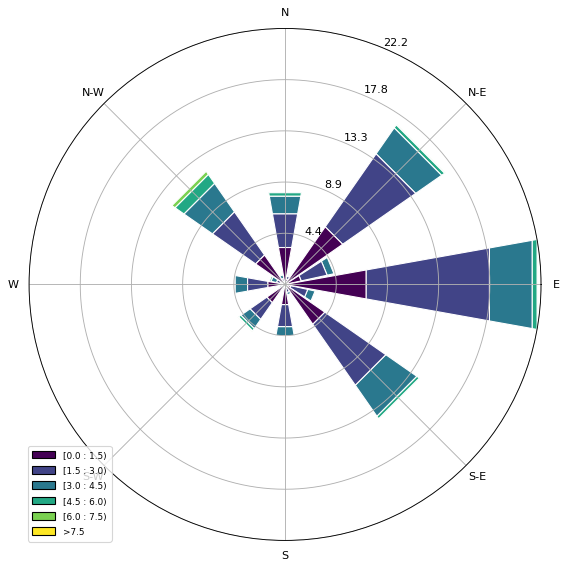

In [29]:
ws = estacao_novo['ws (m/s)'].values
wd = estacao_novo['wd (graus)'].values

ax = wr.WindroseAxes.from_ax(theta_labels = ('E', 'N-E', 'N', 'N-W', 'W', 'S-W', 'S', 'S-E'))
ax.bar(wd, ws, normed = True, opening = 0.9, edgecolor = 'white')
ax.set_legend()

### Ponto de orvalho
- Descobrir o horário médio do nascer e por do sol
- Temperatura do ponto de orvalho - Fórmula de Magnus

In [31]:
temp = estacao['Outdoor Temperature(oC)'].values
umidade_relativa = estacao['Outdoor Humidity(%)'].values

t_orvalho = temp - (100-umidade_relativa)/5 # versão simplificada de se obter a temperatura


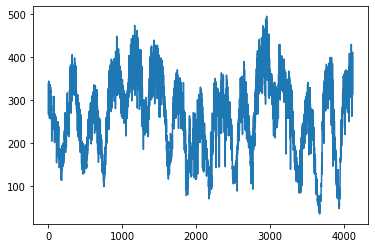

In [44]:
wci = pd.DataFrame({'ws' : estacao['Wind Speed(m/s)'].values, 'Temperatura ar' : temp})
wci

WCI = (10*np.sqrt(wci['ws']) - wci['ws']+10.5) * (33 - wci['Temperatura ar'])
WCI.plot()

